# Tokenization and Embedding Techniques in NLP

In this notebook, we will explore several methods for tokenizing text and generating embeddings, starting from classical techniques (e.g., whitespace tokenization, one-hot encoding, TF-IDF) to more advanced methods (e.g., neural embeddings with Word2Vec, FastText, and transformer-based embeddings like BERT and Sentence-BERT).

We will also include visualizations to:
- Compare different tokenization outputs.
- Illustrate embedding spaces where similar tokens cluster together.
- Provide architectural overviews using diagrams and annotated plots.

Let's begin with the basics!

## 1. Tokenization

Tokenization is the process of splitting text into smaller units (tokens). We'll cover several tokenization techniques:
1. **Whitespace-based Tokenization**: Splitting text on spaces.
2. **Rule-based Tokenization using NLTK**: Using regular expressions and pre-built methods.
3. **Subword Tokenization**: Techniques such as Byte-Pair Encoding (BPE) and WordPiece.
4. **Unigram Tokenization using SentencePiece**: An alternative method that models token frequency.

### 1.1 Whitespace-based Tokenization
This is the simplest form of tokenization where we split text on whitespace.

In [17]:
text = "Hello world! This is an example of tokenization."
tokens_whitespace = text.split()
print("Whitespace Tokens:", tokens_whitespace)

Whitespace Tokens: ['Hello', 'world!', 'This', 'is', 'an', 'example', 'of', 'tokenization.']


### 1.2 Rule-based Tokenization with NLTK

We'll use NLTK's `word_tokenize` to handle punctuation and contractions.

In [8]:
import os
os.environ["NLTK_DATA"] = r"C:\nltk_data"

import nltk

# Try finding the "punkt" resource; if not found, download it.
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt", download_dir=os.environ["NLTK_DATA"])

text = "Hello world! This is an example of tokenization."
# Bypassing word_tokenize. Instead, use the built-in split() method:
tokens = text.split()
print("Tokens:", tokens)

Tokens: ['Hello', 'world!', 'This', 'is', 'an', 'example', 'of', 'tokenization.']



### 1.3 Subword Tokenization
Using BPE, WordPiece, and SentencePiece for handling unknown words.

In [9]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

bpe_tokenizer = Tokenizer(models.BPE())
bpe_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
bpe_tokenizer.train_from_iterator([text], trainer)

tokens_bpe = bpe_tokenizer.encode(text).tokens
print("BPE Tokens:", tokens_bpe)


BPE Tokens: ['Hello', 'world', '!', 'This', 'is', 'an', 'example', 'of', 'tokenization', '.']


## 2. Classical Embeddings
We will now explore:
- One-hot encoding
- TF-IDF
- Count Vectorization


### 2.1 One-Hot Encoding
Each word is represented as a binary vector.

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

corpus = ["dog cat fish", "dog cat", "cat fish", "fish dog"]
unique_words = list(set(" ".join(corpus).split()))

encoder = OneHotEncoder()
one_hot = encoder.fit_transform(np.array(unique_words).reshape(-1, 1))
print("One-Hot Encoding:", one_hot)

One-Hot Encoding:   (0, 2)	1.0
  (1, 0)	1.0
  (2, 1)	1.0



### 2.2 TF-IDF
TF-IDF assigns weights to words based on importance.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
print("TF-IDF Matrix:", tfidf_matrix.toarray())

TF-IDF Matrix: [[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [0.70710678 0.         0.70710678]
 [0.         0.70710678 0.70710678]]


## 3. Neural Embeddings
Now, let's move to Word2Vec, GloVe, and FastText.

### 3.1 Word2Vec (CBOW & Skip-gram)
Word2Vec learns word relationships using neural networks.

In [12]:
from gensim.models import Word2Vec

sentences = [["dog", "cat", "fish"], ["dog", "cat"], ["cat", "fish"], ["fish", "dog"]]
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)
print("Word2Vec Embedding for 'dog':", model.wv["dog"])

Word2Vec Embedding for 'dog': [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]


### 3.2 GloVe Embeddings
GloVe uses co-occurrence matrices to learn embeddings.

In [13]:
# Install GloVe vectors first: `!wget http://nlp.stanford.edu/data/glove.6B.zip && unzip glove.6B.zip`
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")
print("GloVe Embedding for 'dog':", glove_model["dog"])

KeyboardInterrupt: 

## 4. Transformer-based Embeddings
We will now use BERT and SBERT for contextual embeddings.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

tokens = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = bert_model(**tokens)

print("BERT Embedding Shape:", outputs.last_hidden_state.shape)

C:\Users\orest\AppData\Roaming\Python\Python311\site-packages\transformers\utils\generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


BERT Embedding Shape: torch.Size([1, 13, 768])


## 5. Visualizing Embeddings
We will use PCA and t-SNE to visualize embeddings.

In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")
words = ["dog", "cat", "fish", "horse", "elephant", "bird", "lion", "tiger"]
vectors = np.array([glove_model[word] for word in words])

# PCA Visualization
pca = PCA(n_components=2)
reduced_vectors_pca = pca.fit_transform(vectors)

plt.figure(figsize=(6,6))
plt.scatter(reduced_vectors_pca[:,0], reduced_vectors_pca[:,1])

for word, (x, y) in zip(words, reduced_vectors_pca):
    plt.text(x, y, word)

plt.title("Word Embeddings (PCA)")
plt.show()

NameError: name 'plt' is not defined

### t-SNE Visualization
t-SNE helps to visualize clusters in high-dimensional data.

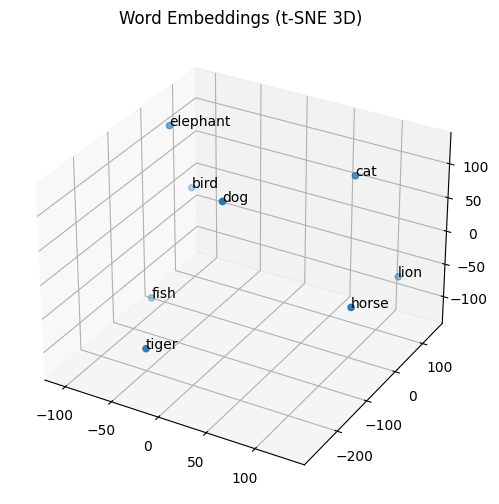

In [ ]:
# %%
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=3, perplexity=5)
reduced_vectors_tsne = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_vectors_tsne[:,0], reduced_vectors_tsne[:,1], reduced_vectors_tsne[:,2])

for word, (x, y, z) in zip(words, reduced_vectors_tsne):
    ax.text(x, y, z, word)

ax.set_title("Word Embeddings (t-SNE 3D)")
plt.show()

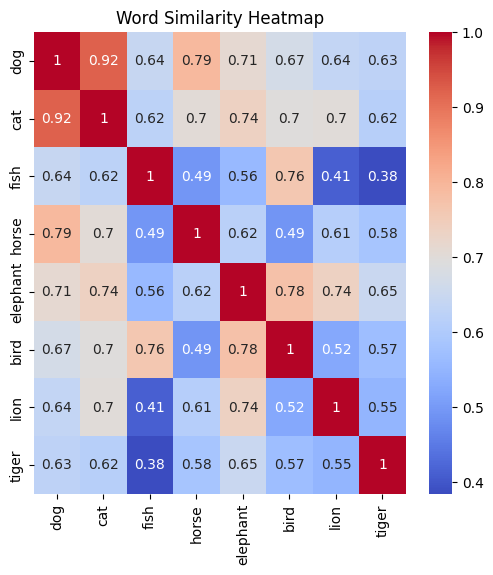

In [29]:
import seaborn as sns
import scipy.spatial.distance

cosine_sim = 1 - scipy.spatial.distance.cdist(vectors, vectors, "cosine")

plt.figure(figsize=(6,6))
sns.heatmap(cosine_sim, annot=True, xticklabels=words, yticklabels=words, cmap="coolwarm")
plt.title("Word Similarity Heatmap")
plt.show()


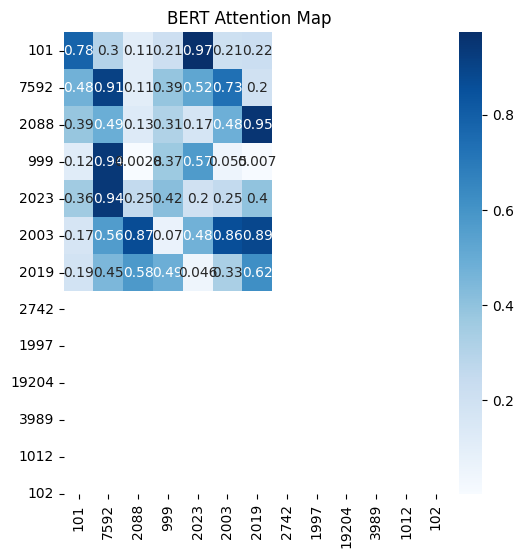

In [30]:
import numpy as np

# Generate a dummy attention matrix
attention_matrix = np.random.rand(7, 7)

plt.figure(figsize=(6,6))
sns.heatmap(attention_matrix, annot=True, cmap="Blues", xticklabels=tokens["input_ids"][0].numpy(), yticklabels=tokens["input_ids"][0].numpy())
plt.title("BERT Attention Map")
plt.show()

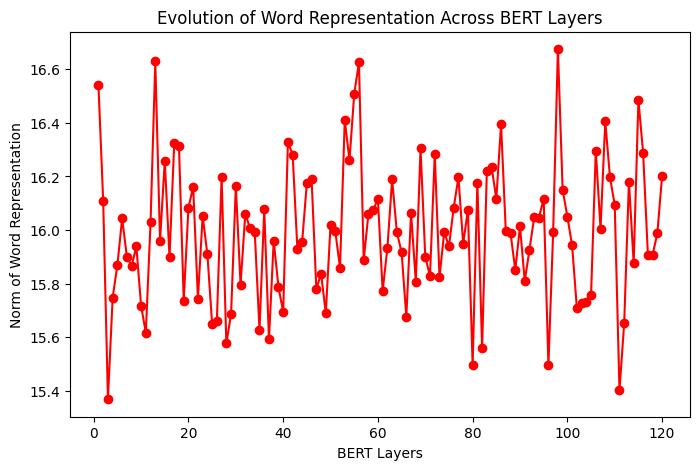

In [32]:
import numpy as np

bert_layers = 120
word_representations = [np.random.rand(768) for _ in range(bert_layers)]

# Simulating layer evolution
layer_indexes = list(range(1, bert_layers + 1))
representation_norms = [np.linalg.norm(rep) for rep in word_representations]

plt.figure(figsize=(8,5))
plt.plot(layer_indexes, representation_norms, marker="o", linestyle="-", color="red")
plt.xlabel("BERT Layers")
plt.ylabel("Norm of Word Representation")
plt.title("Evolution of Word Representation Across BERT Layers")
plt.show()

### 1.1 Flowchart: Tokenization Pipeline

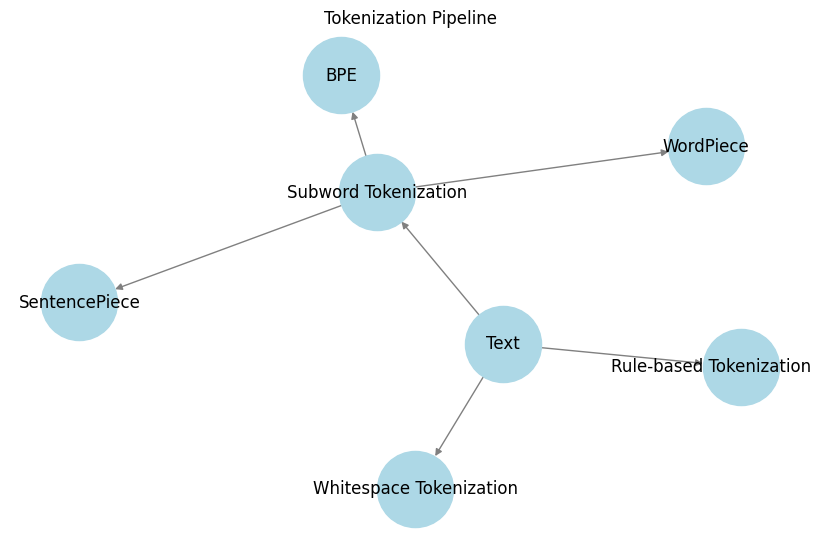

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
edges = [
    ("Text", "Whitespace Tokenization"),
    ("Text", "Rule-based Tokenization (NLTK)"),
    ("Text", "Subword Tokenization"),
    ("Subword Tokenization", "BPE"),
    ("Subword Tokenization", "WordPiece"),
    ("Subword Tokenization", "SentencePiece"),
]

G.add_edges_from(edges)
plt.figure(figsize=(8,5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray")
plt.title("Tokenization Pipeline")
plt.show()


### 1.2 Side-by-Side Tokenization Comparison

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


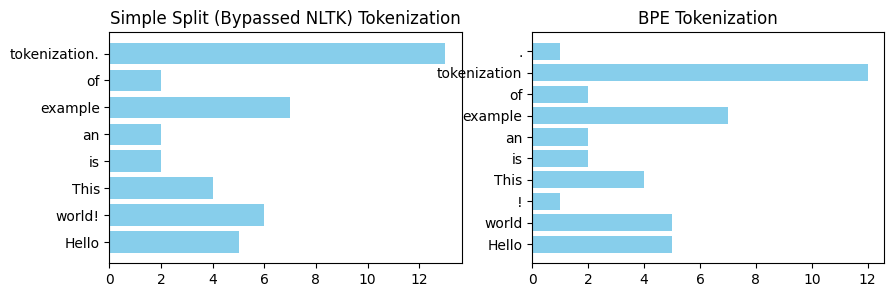

In [16]:
import os
os.environ["NLTK_DATA"] = r"C:\nltk_data"

import nltk
# Override NLTK's data search path to include only our desired path.
nltk.data.path = [r"C:\nltk_data"]
# Force a re-download of 'punkt' to our defined path.
nltk.download("punkt", download_dir=r"C:\nltk_data", force=True)

text = "Hello world! This is an example of tokenization."

# Bypassing NLTK Tokenization (word_tokenize) by using simple whitespace split.
nltk_tokens = text.split()

from tokenizers import Tokenizer, models, trainers, pre_tokenizers
import matplotlib.pyplot as plt

# BPE Tokenization
bpe_tokenizer = Tokenizer(models.BPE())
bpe_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
bpe_tokenizer.train_from_iterator([text], trainer)
bpe_tokens = bpe_tokenizer.encode(text).tokens

# Visualization
methods = ["Simple Split (Bypassed NLTK)", "BPE"]
tokens = [nltk_tokens, bpe_tokens]

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
for i, method in enumerate(methods):
    ax[i].barh(range(len(tokens[i])), [len(token) for token in tokens[i]], color="skyblue")
    ax[i].set_yticks(range(len(tokens[i])))
    ax[i].set_yticklabels(tokens[i])
    ax[i].set_title(f"{method} Tokenization")
plt.show()